## Importing libraries

In [2]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import  layers

## Neccessary functions

In [19]:
def load_img(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray,img


def detect_faces(gray_img):
    faces=front_cascade.detectMultiScale(gray_img, 1.3, 6)
    return faces

def get_model1(weights): # to remove
    ip = layers.Input(shape=(48,48,1))
    x = layers.Conv2D(filters=32,kernel_size=3,padding='same', activation='relu' )(ip)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters=64,kernel_size=3,padding='same', activation='relu' )(x)
    x = layers.BatchNormalization()(x)  
    x = layers.MaxPooling2D(pool_size=(2,2) )(x)

    x = layers.Dropout(0.5)(x)

    x = layers.Conv2D(filters=128,kernel_size=3,padding='same', activation="relu" )(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters=128,kernel_size=3,padding='same', activation="relu" )(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2,2) )(x)

    x = layers.Conv2D(filters=256,kernel_size=3,padding='same', activation="relu" )(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters=256,kernel_size=3,padding='same', activation="relu" )(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2,2) )(x)


    x = layers.Dropout(0.5)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(516, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)
    op = layers.Dense(7, activation='sigmoid')(x)



    model2 = keras.Model(inputs=ip, outputs=op)
    model2.load_weights(weights)
    return model2

def get_model(weights):
    ip = layers.Input(shape=(48,48,1))
    x = layers.Conv2D(filters=32,kernel_size=3,padding='same', activation='relu' )(ip)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters=64,kernel_size=3,padding='same', activation='relu' )(x)
    x = layers.BatchNormalization()(x)  
    x = layers.MaxPooling2D(pool_size=(2,2) )(x)

    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(filters=128,kernel_size=3,padding='same', activation="relu" )(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters=128,kernel_size=3,padding='same', activation="relu" )(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2,2) )(x)

    x = layers.Conv2D(filters=256,kernel_size=3,padding='same', activation="relu" )(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters=256,kernel_size=3,padding='same', activation="relu" )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dropout(0.25)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(516, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)
    op = layers.Dense(7, activation='sigmoid')(x)



    model3 = keras.Model(inputs=ip, outputs=op)
    model3.load_weights(weights)
    return model3


classes = {0:'angry',
 1:'disgusted',
 2:'fearful',
 3:'happy',
 4:'neutral',
 5:'sad',
 6:'surprised'}


def preprocess_img(img):
  img = cv2.resize(img, (48,48))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = np.expand_dims(img, axis=0)
  return img/255.0


def check_emotions(org_img, faces):
    for face in faces:
        x,y,w,h=face
        cropped_img = org_img[y:y+h,x:x+w]
        plt.imshow(cropped_img)
        plt.show()
        
        test_img = preprocess_img(cropped_img) 
        res = model.predict(test_img)
        print(f"probability scores {res}")
        emotion = np.argmax(res)
        
        print(f"detected emotion: {classes.get(emotion)}")
        cv2.rectangle(org_img, (x, y), (x + w, y + h), (36,255,12), 1)
        cv2.putText(org_img, classes.get(emotion), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
  
    return org_img 
    
#plt.imshow(img)
#plt.show()

## Loading both face detector and Neural Network

In [39]:
model = get_model('saved_models/increased_acc_82_66.h5')
front_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

## prediction from an image

faces detected: 1


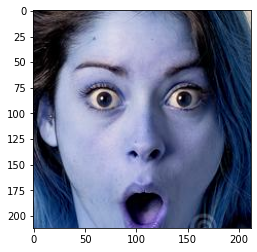

probability scores [[0.13053235 0.00438911 0.77161705 0.28716987 0.14010876 0.02845073
  0.9995189 ]]
detected emotion: surprised


In [21]:
def manual_prediction(path):
    gray, img = load_img(path)
    faces = detect_faces(gray)
    print(f"faces detected: {len(faces)}")
    marked_img=check_emotions(img, faces)
    cv2.imshow("frame",marked_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    
manual_prediction('surprise.jpg')    

## capturing image from webcam

In [6]:

def capture_from_camera():
    cap = cv2.VideoCapture(0)
    t1=time.time()

    flag=0
    while(True):
        ret, frame = cap.read()
        copy=frame.copy()
        if(ret==False):
            break
    
        t2=time.time()
    
        cv2.putText(frame,str(int(t2-t1)),(250,250), cv2.FONT_HERSHEY_DUPLEX, 4,(255,0,0),2)

        cv2.imshow("camera",frame)
        if(cv2.waitKey(1)==ord('q') ):
            break
    
        if(int(t2-t1)==5):
            recorded_frame=copy
            flag=1
            break
        
    cap.release()
    cv2.destroyAllWindows()

    if(flag==1):
        cv2.imshow("recorded_image", recorded_frame)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    
    faces = detect_faces(cv2.cvtColor(recorded_frame, cv2.COLOR_BGR2GRAY))
    print(f"faces detected: {len(faces)}")
    marked_img = check_emotions(recorded_frame, faces)
    cv2.imshow("marked_img",marked_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

faces detected: 1


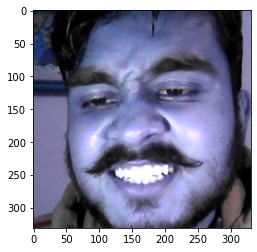

probability scores [[9.8239541e-01 9.5811099e-02 1.3637584e-01 9.9843764e-01 7.7076232e-01
  9.5248485e-01 6.4002124e-05]]
detected emotion: happy


In [50]:
capture_from_camera()